In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
# LabelEncoding
from sklearn.preprocessing import LabelEncoder
# Scaler Feature
from sklearn.preprocessing import StandardScaler
# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score 

In [164]:
import pickle

In [165]:
df = pd.read_csv("lung cancer data.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [166]:
df['GENDER'].value_counts()

GENDER
M    162
F    147
Name: count, dtype: int64

In [167]:
df.shape

(309, 16)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [169]:
# Statistic summary 
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [170]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [171]:
# Check missing Value
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

## Label Encoding 

In [173]:
# from sklearn.preprocessing import LabelEncoder

In [174]:
# use to category to change the numeric value
# Encoder 
label_encoder = LabelEncoder()

# Apply to columns
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

## Scale Features

In [176]:
# from sklearn.preprocessing import StandardScaler

In [177]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

standardized_df = pd.DataFrame(standardized_data, columns=df.columns)

In [178]:
standardized_df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.952579,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475,0.380058
1,0.952579,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475,0.380058
2,-1.049781,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475,-2.631174
3,0.952579,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475,-2.631174
4,-1.049781,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480,-2.631174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,-1.049781,-0.814095,-1.135292,-1.150351,-0.996769,0.996769,0.990338,0.696833,-1.120480,-1.120480,0.892475,0.852207,0.748736,1.063501,-1.120480,0.380058
305,0.952579,0.893846,0.880830,-1.150351,-0.996769,-1.003241,-1.009756,0.696833,0.892475,0.892475,0.892475,0.852207,0.748736,-0.940291,0.892475,0.380058
306,0.952579,-0.570103,0.880830,-1.150351,-0.996769,-1.003241,-1.009756,-1.435063,0.892475,0.892475,0.892475,0.852207,-1.335584,-0.940291,0.892475,0.380058
307,0.952579,0.527859,0.880830,-1.150351,1.003241,-1.003241,-1.009756,0.696833,0.892475,-1.120480,0.892475,0.852207,0.748736,-0.940291,0.892475,0.380058


## Perform Exploratory Data Analysis (EDA) for your lung cancer dataset

## Male=1 & Female=0. Also for other variables, YES=1 & NO=0

In [181]:
# Count the number of Gender
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

In [182]:
# value count by gender
df['GENDER'].value_counts()

GENDER
1    162
0    147
Name: count, dtype: int64

In [183]:
# Average of the Age
df['AGE'].mean()

62.67313915857605

# Visualization

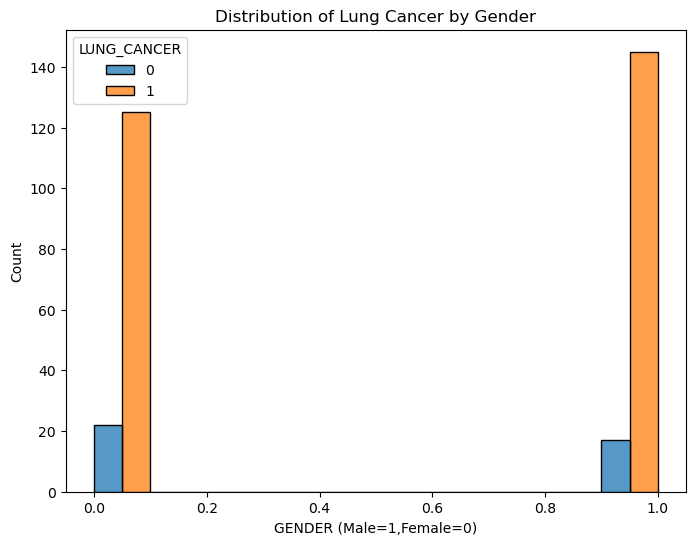

In [185]:
# plot LUNG_CANCER BY GENDER
plt.figure(figsize=(8,6))
sns.histplot(x='GENDER', data=df, hue='LUNG_CANCER', multiple='dodge')
plt.title('Distribution of Lung Cancer by Gender')
plt.xlabel('GENDER (Male=1,Female=0)')
plt.ylabel('Count')
plt.show()

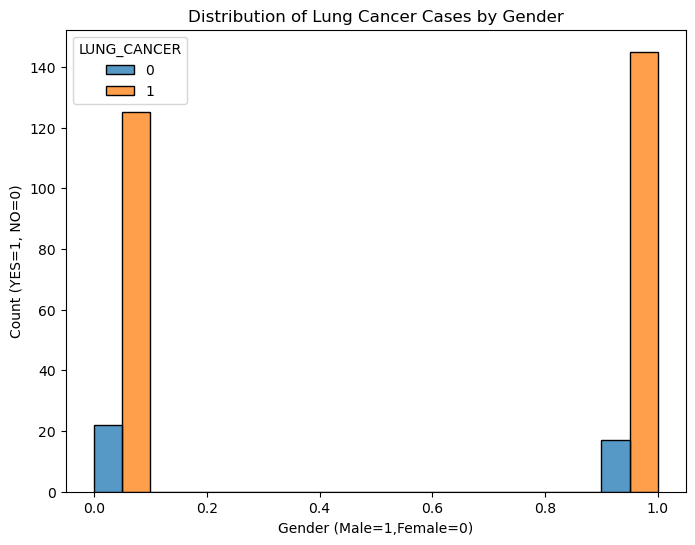

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(x='GENDER', data=df, hue='LUNG_CANCER', multiple='dodge')
plt.title('Distribution of Lung Cancer Cases by Gender')
plt.xlabel('Gender (Male=1,Female=0)')
plt.ylabel('Count (YES=1, NO=0)')
plt.show()


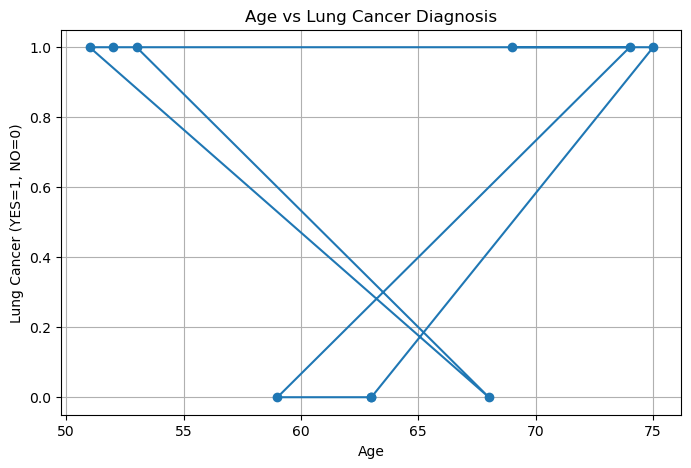

In [187]:
plt.figure(figsize=(8,5))

plt.plot(df['AGE'].head(10), df['LUNG_CANCER'].head(10), marker='o') 
plt.xlabel('Age')
plt.ylabel('Lung Cancer (YES=1, NO=0)')
plt.title('Age vs Lung Cancer Diagnosis')
plt.grid(True)
plt.show()

# Pair plot

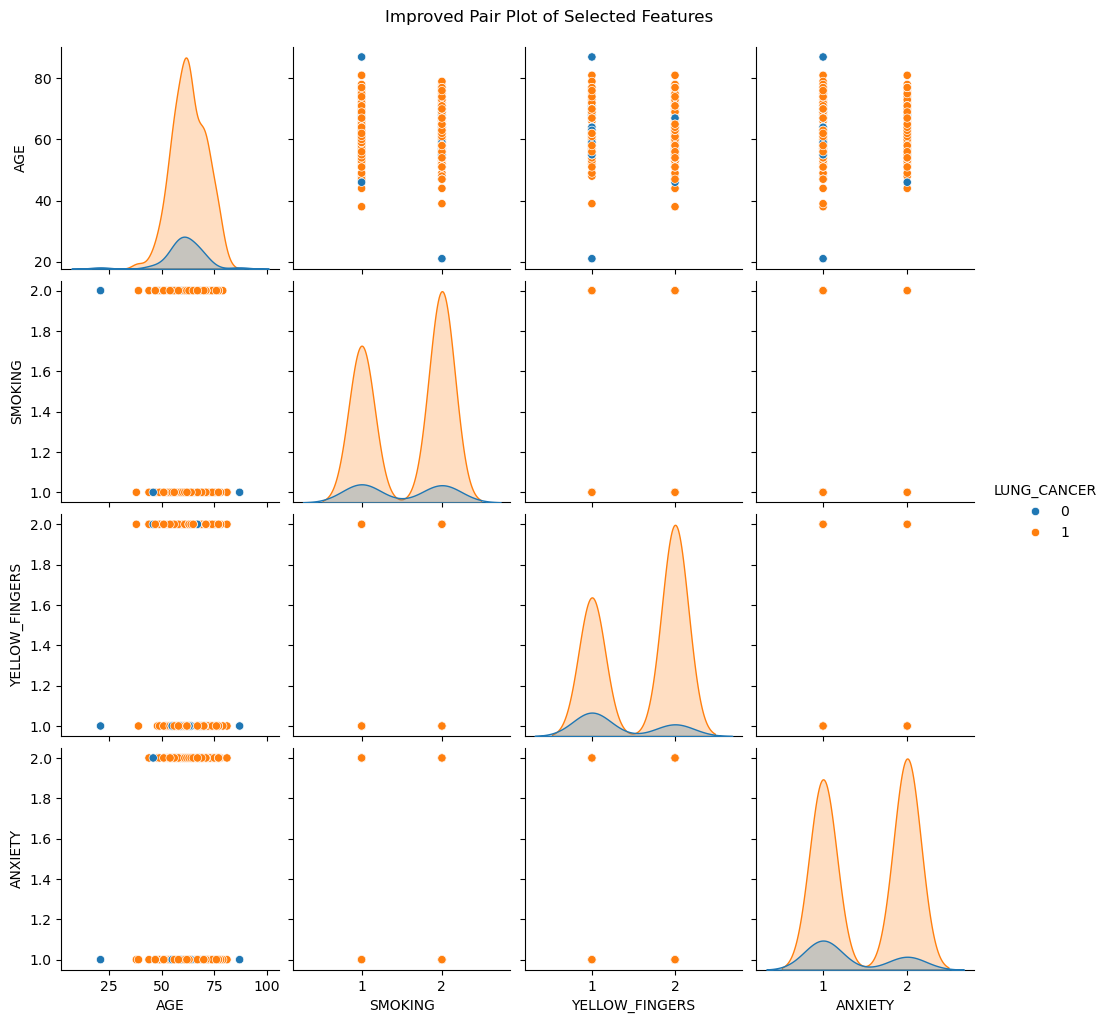

In [189]:
# Create a better pairplot with smaller figure size and selected features
selected_features = ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'LUNG_CANCER']

sns.pairplot(df[selected_features], hue='LUNG_CANCER', height=2.5)
plt.suptitle('Improved Pair Plot of Selected Features', y=1.02)
plt.show()

### The Distribution of Target Variable

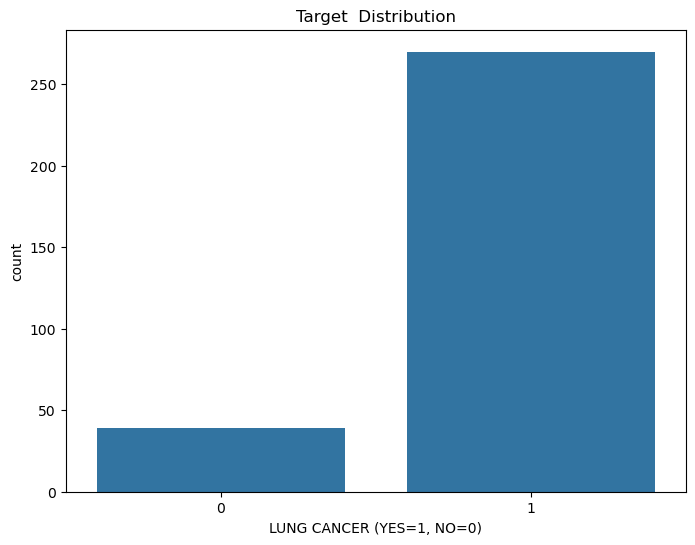

In [191]:
# The Distribution of Target Variable
plt.figure(figsize=(8,6))
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Target  Distribution')
plt.xlabel('LUNG CANCER (YES=1, NO=0)')
plt.show()

### Histograms for Feature Distributions

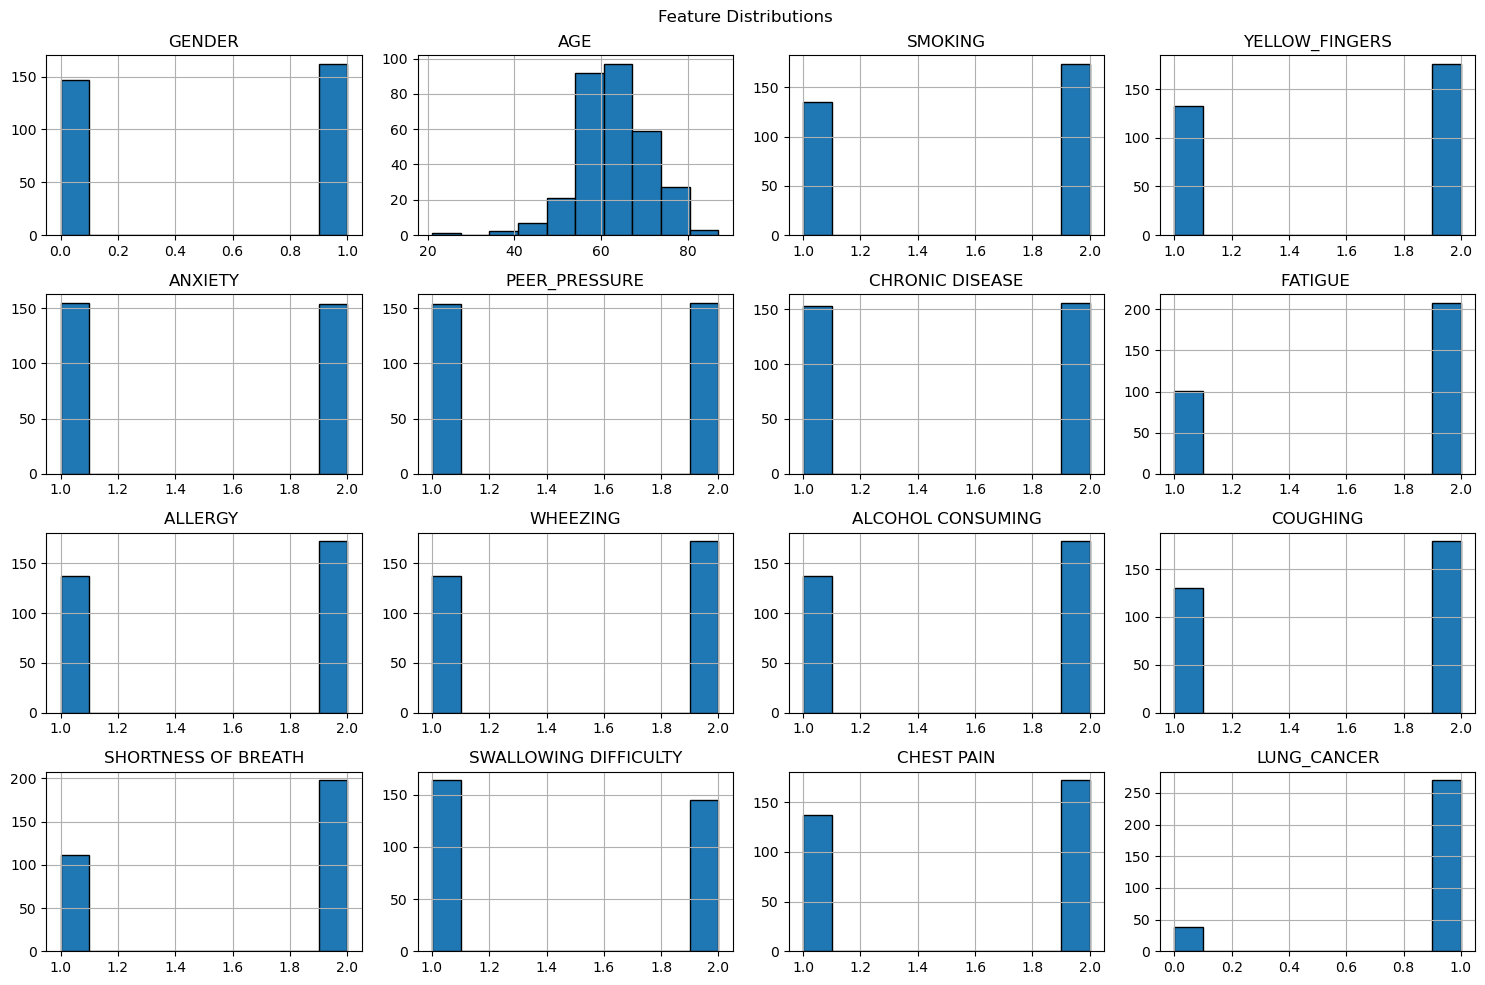

In [193]:
# Histograms for Feature Distributions
df.hist(figsize=(15, 10), bins=10, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

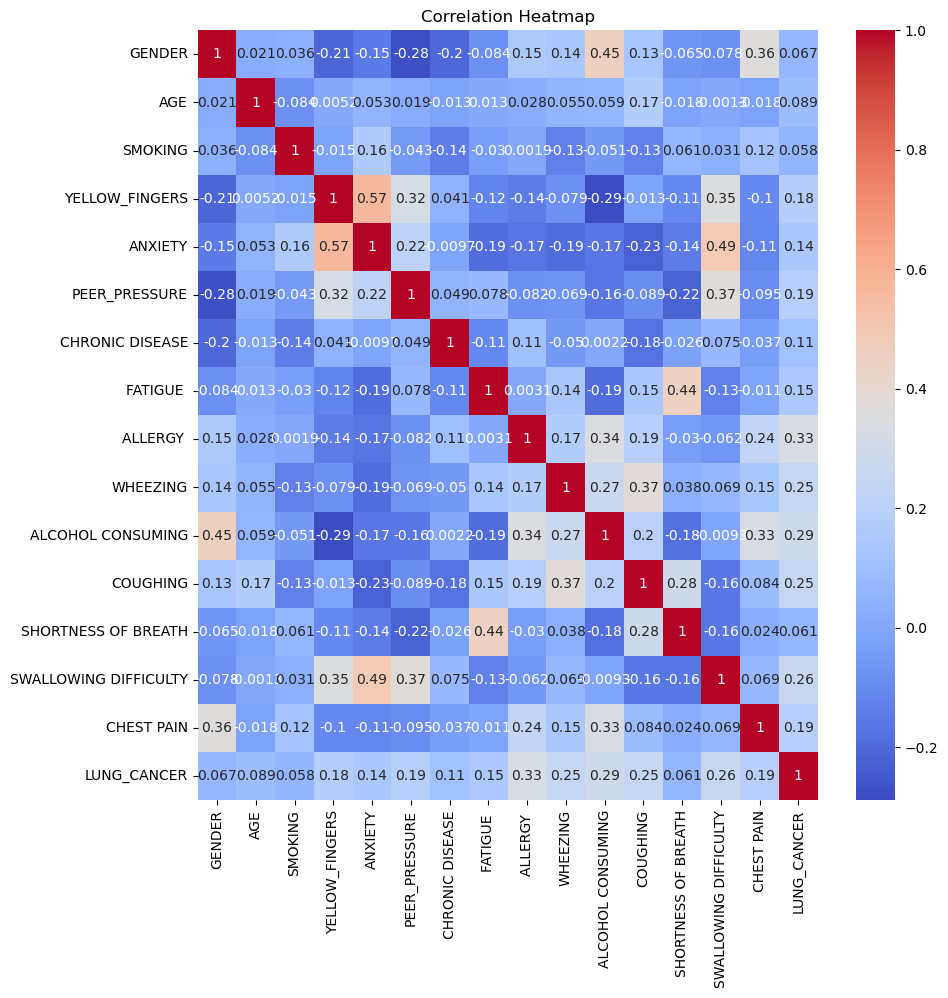

In [194]:
# Correlation Matrix Heatmap
correlation_metrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(correlation_metrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

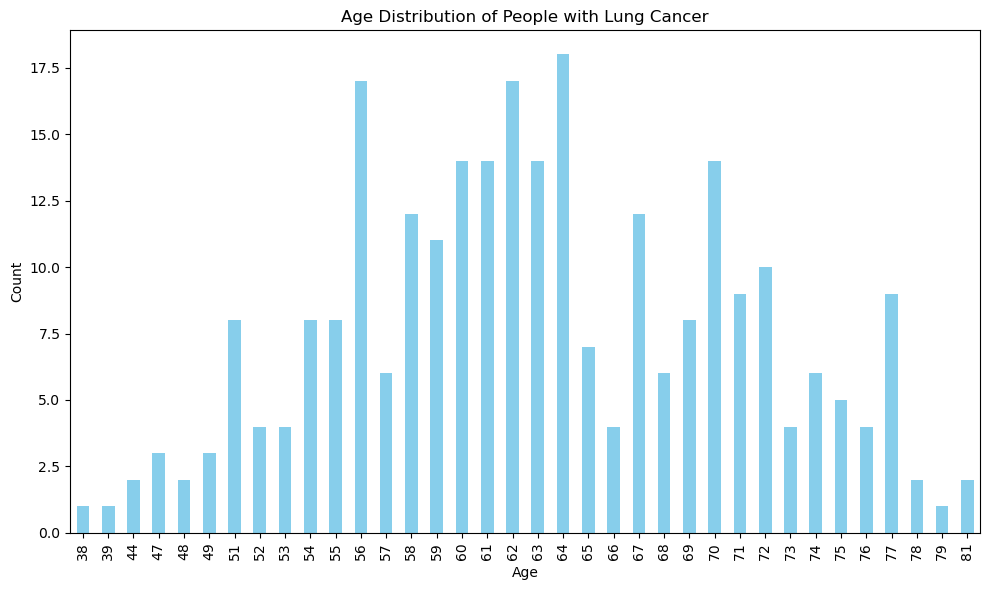

In [195]:
lung_cancer_yes = df[df['LUNG_CANCER'] == 1]

# Plotting the age distribution for people with lung cancer
lung_cancer_yes['AGE'].value_counts().sort_index().plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Age Distribution of People with Lung Cancer')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [196]:
print(df.corr()["LUNG_CANCER"].abs().sort_values(ascending=False))

LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER                   0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
Name: LUNG_CANCER, dtype: float64


# Model Selection:

## Prepare Features and Target

In [199]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']       

## Train & Test Split

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
len(X_train), len(X_test)

(247, 62)

In [203]:
len(y_train), len(y_test)

(247, 62)

## Scale the Data

In [205]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Models

## Model 1
 * ### Logistic Regression

In [208]:
logistic_model = LogisticRegression(n_jobs=-1, max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

In [209]:
logistic_model.score(X_train, y_train)

C:\Users\CS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.8502024291497976

In [210]:
logistic_model.score(X_test, y_test)

C:\Users\CS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.967741935483871

## 2. Decision Tree

In [212]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)  

DecisionTreeClassifier()

In [213]:
tree_model.score(X_train, y_train)

0.9959514170040485

In [214]:
tree_model.score(X_test, y_test)

0.967741935483871

## Model 3
  * ### Random Forest

In [216]:
forest_model = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [217]:
forest_model.score(X_train, y_train)

0.9959514170040485

In [218]:
forest_model.score(X_test, y_test)

0.967741935483871

## 4. Support Vector Machine (SVM)

In [220]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [221]:
svm_model.score(X_train, y_train)

C:\Users\CS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.8502024291497976

In [222]:
svm_model.score(X_test, y_test)

C:\Users\CS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.967741935483871

## Predict Model

In [224]:
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_tree = tree_model.predict(X_test)
y_pred_rf = forest_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the models

### Logistic Regression

In [227]:
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

Accuracy: 0.967741935483871


### Decision Tree

In [229]:
print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

Accuracy: 0.967741935483871


### Random Forest

In [231]:
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

Accuracy: 0.967741935483871


### SVM 

In [233]:
print("=== SVM ===")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

=== SVM ===
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

Accuracy: 0.967741935483871


In [234]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_logistic),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm)
]

summary = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print("=== Model Comparison ===")
print(summary)

=== Model Comparison ===
                 Model  Accuracy
0  Logistic Regression  0.967742
1        Decision Tree  0.967742
2        Random Forest  0.967742
3                  SVM  0.967742


## Random Forest

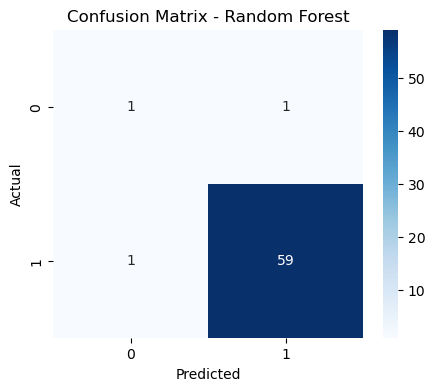

In [236]:
# Confusion Matrix for Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

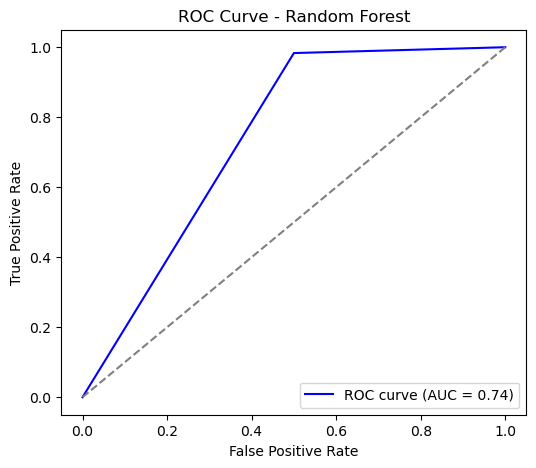

In [263]:
fpr, tpr, _ = roc_curve(y_test, y_pred_logistic)
roc_auc = roc_auc_score(y_test, y_pred_logistic)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

# Saving Models

In [295]:
import pickle

In [313]:
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [315]:
with open('logistic_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [329]:

# 5. Predict and Check
y_pred = loaded_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.967741935483871


In [317]:
with open('tree_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [307]:
with open('forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [342]:
 # Load model
with open('forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

ValueError: peek of closed file

In [325]:
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(model, f)